In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [6]:
csv_url = r"C:\Users\lenovo\Downloads\Electric_Vehicle_Population_Data.csv"
df = pd.read_csv(csv_url)

In [7]:
df.shape

(235692, 17)

In [8]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [9]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235692 entries, 0 to 235691
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         235692 non-null  object 
 1   County                                             235689 non-null  object 
 2   City                                               235689 non-null  object 
 3   State                                              235692 non-null  object 
 4   Postal Code                                        235689 non-null  float64
 5   Model Year                                         235692 non-null  int64  
 6   Make                                               235692 non-null  object 
 7   Model                                              235692 non-null  object 
 8   Electric Vehicle Type                              235692 non-null  object

In [11]:
# 1. Check for Missing Values
missing_values_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage Missing': (df.isnull().sum() / len(df)) * 100
})
print("Missing Values Summary:")
print(missing_values_summary)

Missing Values Summary:
                                                   Missing Values  \
VIN (1-10)                                                      0   
County                                                          3   
City                                                            3   
State                                                           0   
Postal Code                                                     3   
Model Year                                                      0   
Make                                                            0   
Model                                                           0   
Electric Vehicle Type                                           0   
Clean Alternative Fuel Vehicle (CAFV) Eligibility               0   
Electric Range                                                 36   
Base MSRP                                                      36   
Legislative District                                          494   
DOL Vehicl

In [12]:
# 2. Handle Missing or Zero Values in Base MSRP and Electric Range
cols_to_check = ['Base MSRP', 'Electric Range']
df[cols_to_check] = df[cols_to_check].replace(0, pd.NA)

for col in cols_to_check:
    median_value = df[col].median()
    df.loc[:, col] = df[col].fillna(median_value)
print("\nZero and missing values handled.")


Zero and missing values handled.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17120\3926399310.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, col] = df[col].fillna(median_value)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17120\3926399310.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, col] = df[col].fillna(median_value)


In [13]:
# 3. Check for Duplicate Records
duplicate_count = df.duplicated(subset=['VIN (1-10)', 'DOL Vehicle ID']).sum()
print(f"\nDuplicate Records Found: {duplicate_count}")

# Remove Duplicates
df = df.drop_duplicates(subset=['VIN (1-10)', 'DOL Vehicle ID'])
print("Duplicates removed.")



Duplicate Records Found: 0
Duplicates removed.


In [14]:
# 4. Anonymize VINs using SHA-256
def anonymize_vin(vin):
    return hashlib.sha256(str(vin).encode()).hexdigest()
df['Anonymized VIN'] = df['VIN (1-10)'].apply(anonymize_vin)
print("\nVINs Anonymized.")


VINs Anonymized.


In [15]:
# 5. Clean and Convert GPS Coordinates
def extract_coordinates(location):
    if pd.isnull(location):
        return None, None
    try:
        coords = location.replace('POINT (', '').replace(')', '').split()
        return float(coords[0]), float(coords[1])
    except Exception:
        return None, None

df[['Longitude', 'Latitude']] = df['Vehicle Location'].apply(extract_coordinates).apply(pd.Series)
print("\nGPS Coordinates Extracted.")

# Save cleaned data
df.to_csv('Cleaned_Electric_Vehicle_Data.csv', index=False)
print("\nData Cleaning Completed and Saved.")




GPS Coordinates Extracted.

Data Cleaning Completed and Saved.


In [16]:
# Data Exploration
print("\nTop 5 Most Common EV Makes and Models:")
print(df.groupby(['Make', 'Model']).size().sort_values(ascending=False).head(5))



Top 5 Most Common EV Makes and Models:
Make       Model  
TESLA      MODEL Y    49253
           MODEL 3    36065
NISSAN     LEAF       13814
TESLA      MODEL S     7885
CHEVROLET  BOLT EV     7278
dtype: int64


In [17]:
print("\nDistribution of EVs by County:")
print(df['County'].value_counts())
print("\nCounty with Most Registrations:", df['County'].value_counts().idxmax())



Distribution of EVs by County:
County
King             118711
Snohomish         28814
Pierce            19256
Clark             14101
Thurston           8595
                  ...  
Doña Ana              1
Norfolk               1
Isle of Wight         1
Jackson               1
Tooele                1
Name: count, Length: 212, dtype: int64

County with Most Registrations: King


In [18]:
print("\nEV Adoption Over Model Years:")
print(df['Model Year'].value_counts().sort_index())


EV Adoption Over Model Years:
Model Year
2000        7
2002        2
2003        1
2008       22
2010       23
2011      680
2012     1490
2013     4230
2014     3407
2015     4661
2016     5306
2017     8570
2018    14368
2019    10974
2020    12265
2021    20615
2022    28958
2023    59893
2024    49044
2025    11176
Name: count, dtype: int64


In [19]:
print("\nAverage Electric Range of EVs:", df['Electric Range'].mean())


Average Electric Range of EVs: 88.96116966210138


In [20]:
print("\nPercentage of EVs Eligible for CAFV Incentives:")
cafv_percentage = (df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].str.contains('Yes', na=False).mean()) * 100
print(f"{cafv_percentage:.2f}%")


Percentage of EVs Eligible for CAFV Incentives:
0.00%


In [21]:
print("\nElectric Range Variation Across Makes and Models:")
print(df.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values())


Electric Range Variation Across Makes and Models:
Make           Model        
TOYOTA         PRIUS PLUG-IN           6.0
LAMBORGHINI    REVUELTO                6.0
MERCEDES-BENZ  C-CLASS                 8.8
PORSCHE        918                    12.0
HONDA          ACCORD                 13.0
                                   ...    
CHEVROLET      BOLT EV          190.451635
JAGUAR         I-PACE           205.767635
PORSCHE        MACAN            228.346154
TESLA          ROADSTER             231.04
HYUNDAI        KONA                  258.0
Name: Electric Range, Length: 171, dtype: object


In [22]:
print("\nAverage Base MSRP for Each EV Model:")
print(df.groupby('Model')['Base MSRP'].mean().sort_values())


Average Base MSRP for Each EV Model:
Model
WHEEGO             32995.0
SOUL EV       33233.816425
SOUL               33347.5
CROSSTREK     41957.688172
COUNTRYMAN    48125.239617
                  ...     
CT6                75095.0
740E          90425.925926
KARMA             102000.0
ROADSTER          104616.0
918               845000.0
Name: Base MSRP, Length: 171, dtype: object


In [23]:
print("\nRegional Trends in EV Adoption:")
urban_counties = ['King', 'Pierce', 'Snohomish', 'Clark']
df['Region'] = df['County'].apply(lambda x: 'Urban' if x in urban_counties else 'Rural')
print(df['Region'].value_counts())


Regional Trends in EV Adoption:
Region
Urban    180882
Rural     54810
Name: count, dtype: int64


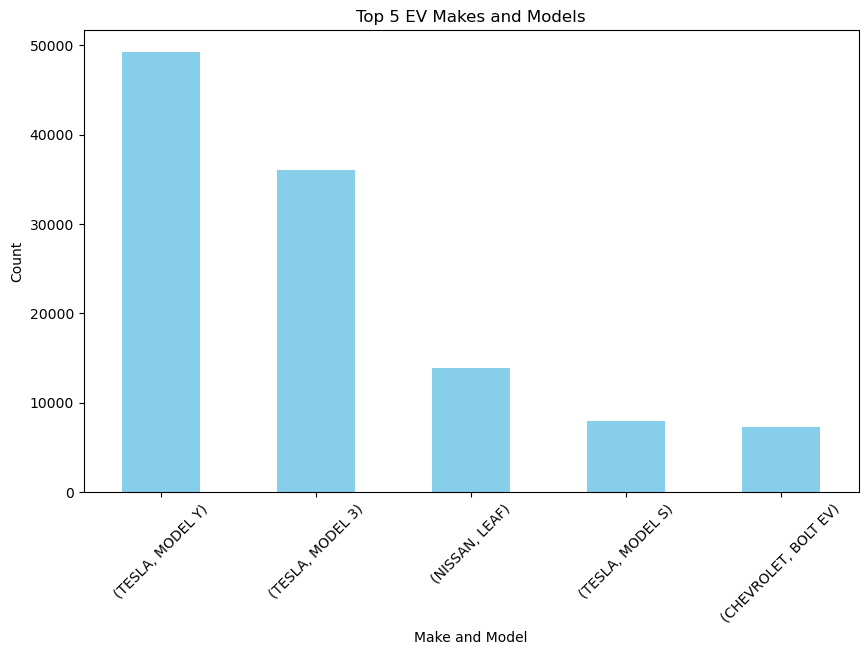

In [24]:
# Data Visualization

# 1. Bar Chart: Top 5 EV Makes and Models
top_makes_models = df.groupby(['Make', 'Model']).size().sort_values(ascending=False).head(5)
top_makes_models.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Top 5 EV Makes and Models')
plt.xlabel('Make and Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

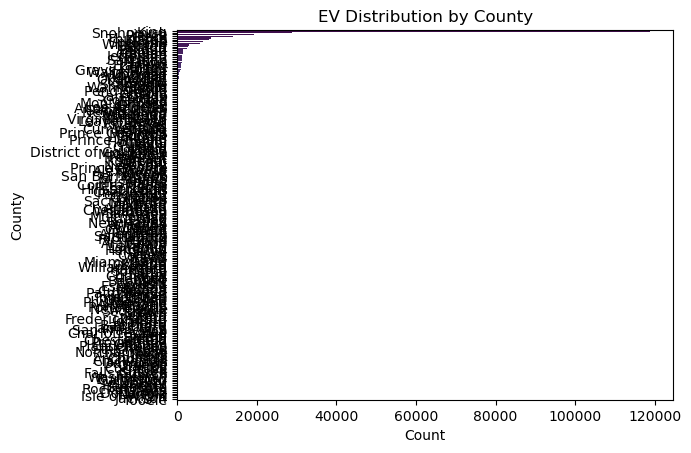

In [25]:
# 2. Heatmap: EV Distribution by County
county_data = df['County'].value_counts().reset_index()
county_data.columns = ['County', 'Count']
sns.barplot(x='Count', y='County', hue='County', data=county_data, palette='viridis', legend=False)
plt.title('EV Distribution by County')
plt.show()


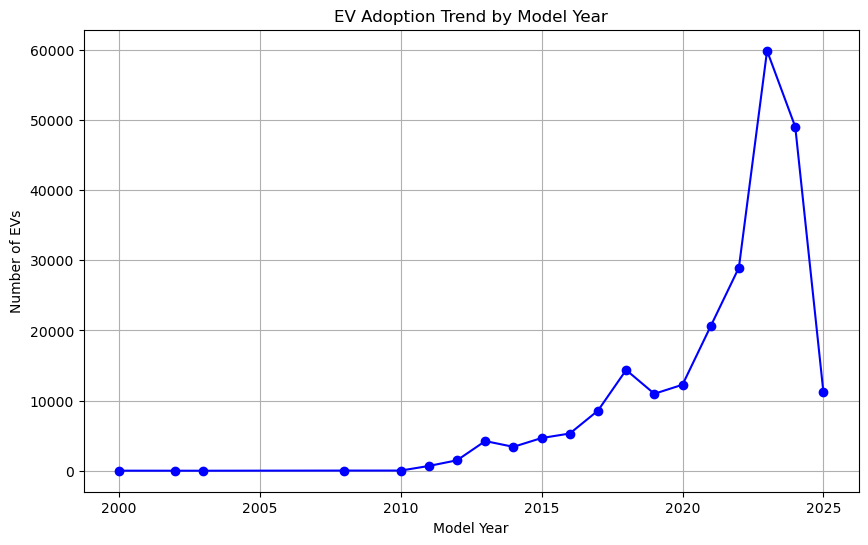

In [26]:
# 3. Line Graph: Trend of EV Adoption by Model Year
model_year_data = df['Model Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(model_year_data.index, model_year_data.values, marker='o', color='blue')
plt.title('EV Adoption Trend by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Number of EVs')
plt.grid(True)
plt.show()

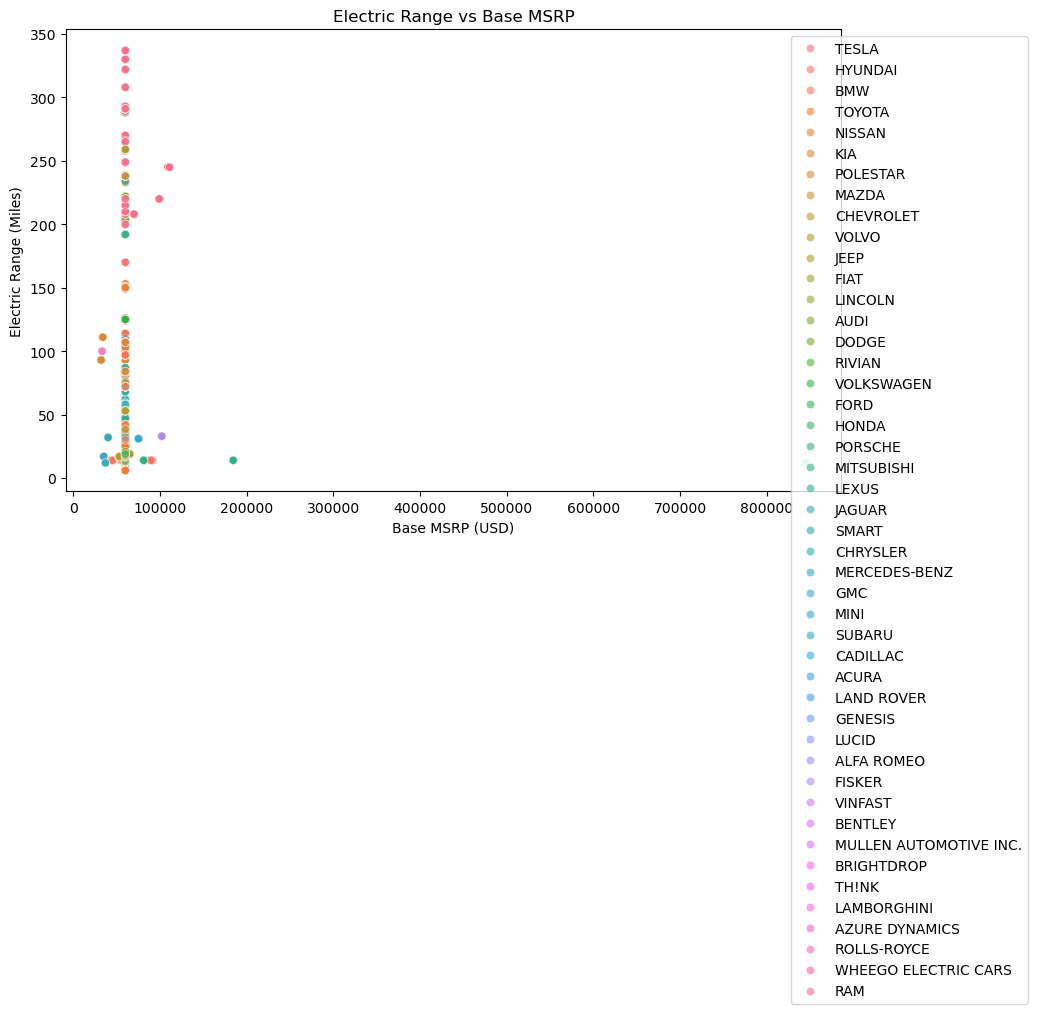

In [27]:
# 4. Scatter Plot: Electric Range vs Base MSRP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Base MSRP', y='Electric Range', data=df, hue='Make', alpha=0.6)
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Base MSRP (USD)')
plt.ylabel('Electric Range (Miles)')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

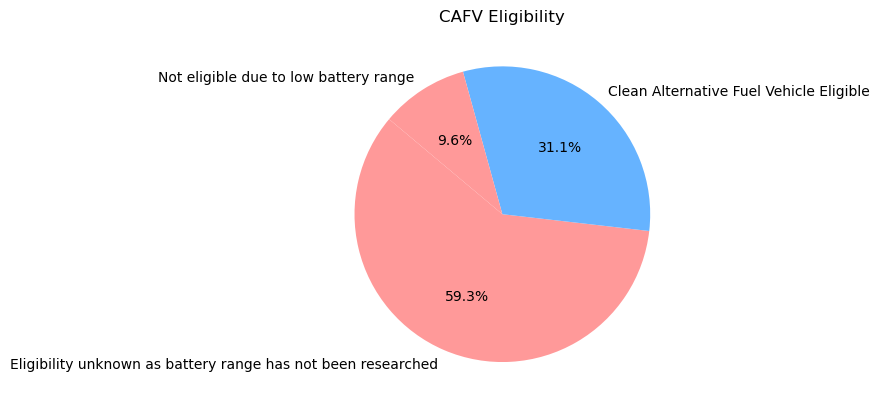

In [28]:
# 5. Pie Chart: CAFV Eligibility
cafv_data = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
cafv_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.title('CAFV Eligibility')
plt.ylabel('')
plt.show()

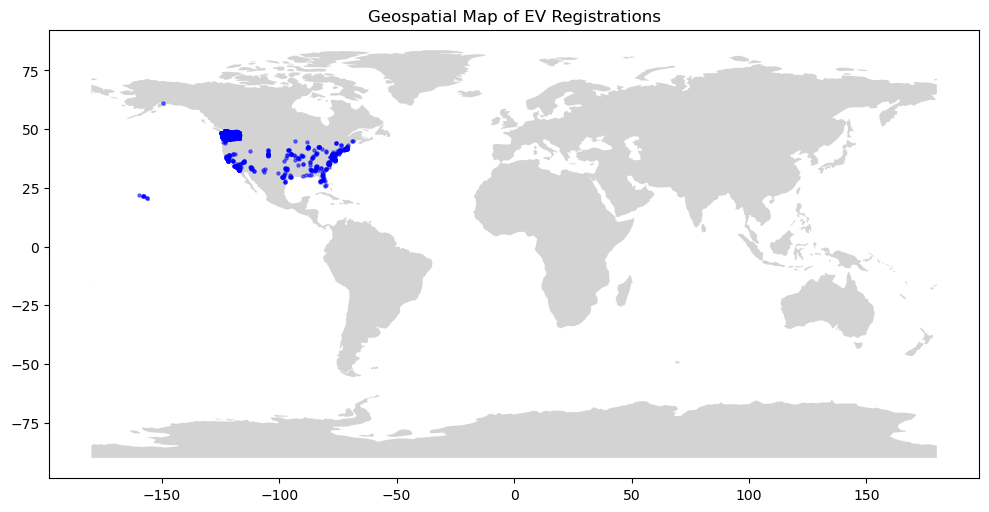

In [32]:
# 6. Geospatial Map: EV Registration Locations
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

fig, ax = plt.subplots(figsize=(12, 8))
world_map_path = geodatasets.get_path('naturalearth.land')
world_map = gpd.read_file(world_map_path)
world_map.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
plt.title('Geospatial Map of EV Registrations')
plt.show()



Mean Squared Error: 2065.399775386313
R² Score: 0.5298706196923133


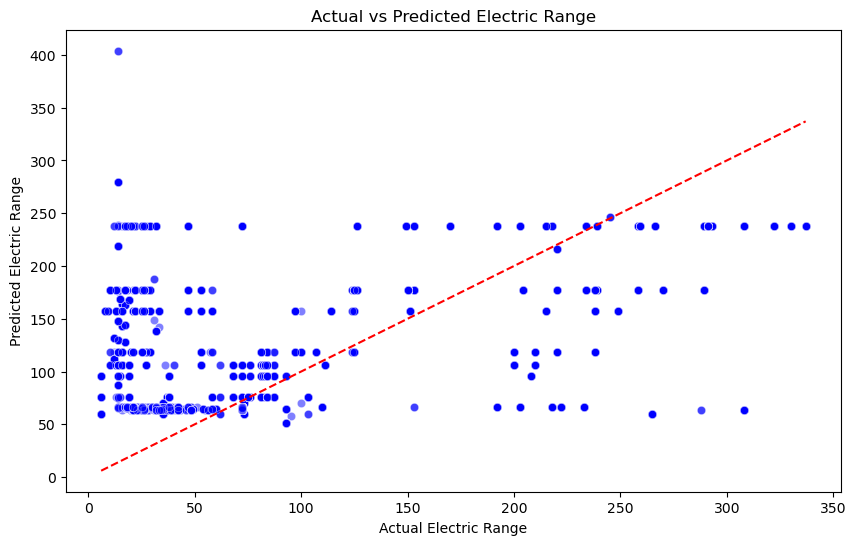

            Feature   Coefficient
14  Model Year_2020  1.794952e+02
13  Model Year_2019  1.192750e+02
12  Model Year_2018  9.978650e+01
4   Model Year_2010  8.698898e+01
3   Model Year_2008  8.063621e+01
11  Model Year_2017  6.068203e+01
10  Model Year_2016  4.852367e+01
9   Model Year_2015  3.783411e+01
1   Model Year_2002  3.700000e+01
8   Model Year_2014  1.780417e+01
7   Model Year_2013  1.772735e+01
5   Model Year_2011  1.217785e+01
17  Model Year_2023  8.533939e+00
15  Model Year_2021  8.300049e+00
16  Model Year_2022  7.065209e+00
19  Model Year_2025  6.756781e+00
18  Model Year_2024  5.929058e+00
6   Model Year_2012  1.279726e+00
0         Base MSRP  1.976928e-03
2   Model Year_2003  3.552714e-13


In [40]:
# Prepare data for regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



X = df[['Model Year', 'Base MSRP']]
y = df['Electric Range']

# Convert categorical data using one-hot encoding
X = pd.get_dummies(X, columns=['Model Year'], drop_first=True)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Electric Range')
plt.ylabel('Predicted Electric Range')
plt.title('Actual vs Predicted Electric Range')
plt.show()

# Model Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))